# Sales Analysis

#### Import Necessary Libraries

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


#### Merging 12 months of sales into a single CSV file

In [28]:
df = pd.read_csv('./Data/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')



files = [file for file in os.listdir('./Data/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Data/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
    
all_months_data.to_csv('all_data.csv', index = False)



#### Read in Updated DataFrame

In [29]:
all_data = pd.read_csv('all_data.csv')
all_data = all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Task 2: Add Month Column

In [30]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data = all_data[all_data['Month'] != 'Or']
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### convert columns to correct type

In [31]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float')

### Add a sales column

In [32]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## which city had the most number of sales in throughout the year?

[Text(0, 0, ' Atlanta GA'),
 Text(1, 0, ' Austin TX'),
 Text(2, 0, ' Boston MA'),
 Text(3, 0, ' Dallas TX'),
 Text(4, 0, ' Los Angeles CA'),
 Text(5, 0, ' New York City NY'),
 Text(6, 0, ' Portland ME'),
 Text(7, 0, ' Portland OR'),
 Text(8, 0, ' San Francisco CA'),
 Text(9, 0, ' Seattle WA')]

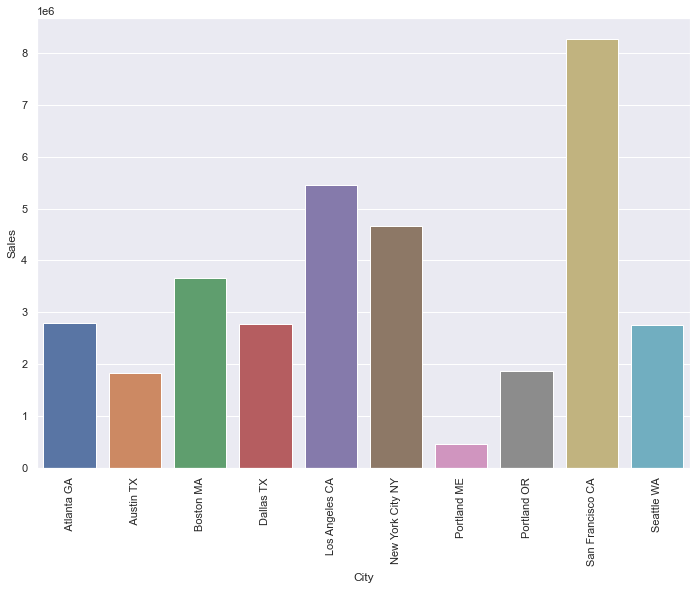

In [33]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x))

city_sales = all_data.groupby('City')['Sales'].sum()

City_sales = pd.DataFrame(city_sales)
City_sales = city_sales.reset_index()

ax = sns.barplot(x='City', y = 'Sales', data = City_sales)
ax.set_xticklabels(City_sales['City'], rotation = 90)

In [ ]:
# According to the data the following cities had the highest number in total sales :
   # the highest number of sales were for customers in San Francisco CA, Followed by Los Angeles CA, and New York City NY.
# The following cities had the lowest numbers in total sales :
  # Portland ME, Austin TX, and Portland OR.

# Question 1 : What was the best month for sales? how much was earned that month?

<AxesSubplot:xlabel='Month', ylabel='Sales'>

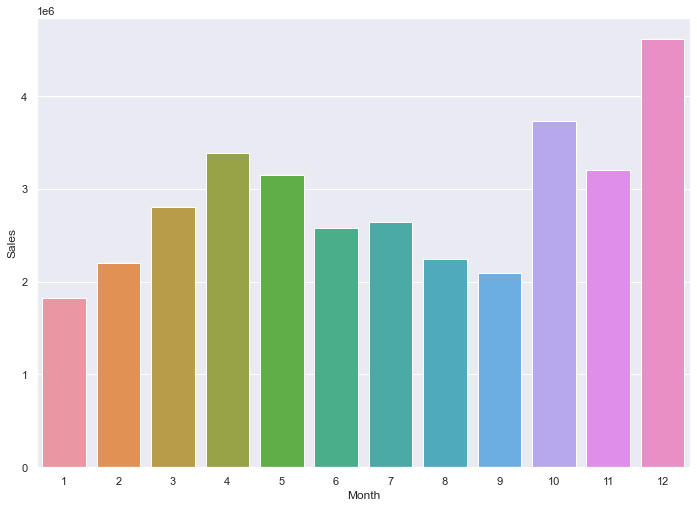

In [35]:
month_sales = all_data.groupby('Month').sum()


month_sales = month_sales.reset_index()

monthly_sales = month_sales[['Month','Sales']]

monthly_sales


sns.set_style('darkgrid')
sns.barplot(x='Month', y='Sales', data =monthly_sales,)


In [36]:
# The Months in 2019 with the highest number of Sales was :
    # From least to highest : November, October and December which it can be inferred it is due to holiday/Christmas Season.
# The Months with the lowest Sales goes as follows:
    # From Least to Highest : January, February, and March

#### WHAT TIME SHOULD WE DISPLAY ADVERTISEMENTS TO MAXIMIZE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT

In [37]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] =all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute



hour_data = all_data.groupby('Hour')['Sales'].sum()
hour_data_df = pd.DataFrame(hour_data)
hour_data_df = hour_data_df.reset_index()

([<matplotlib.axis.XTick at 0x288504aee90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

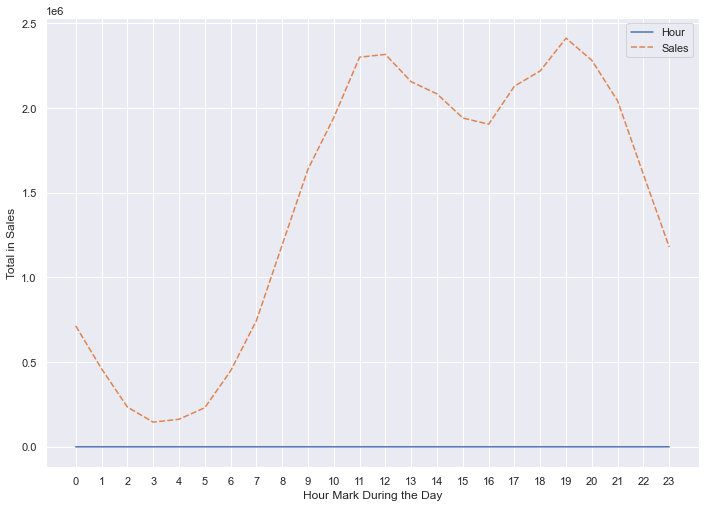

In [38]:
ax1 = sns.lineplot(data = hour_data_df )
ax.set_xticks(hour_data_df['Hour'])
plt.xlabel('Hour Mark During the Day')
plt.ylabel('Total in Sales')
plt.xticks(hour_data_df['Hour'])

In [39]:
#according to peak hour times for sales throughout the year:
    #customers tend to buy products with more frequency around the peak hours of 11 am to 12pm, and from 6pm through 7 pm.

# from 10 am through 9 pm sales numbers can be seen to stay relatively high compared to the hours from  past 9pm to before 10 am.

#### question 4 : what product was the most sold together?

In [40]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Igor\AppData\Local\Temp\ipykernel_45508\3892263634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [41]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [42]:
most_sold = all_data.groupby('Product')['Quantity Ordered'].sum()


In [43]:
# The items that were sold the most together were :
    # iPhones and Lightning Charging Cable, with a total of 1005 orders, followed by Google Phones and USB-C Charging Cables with 987 orders in total.

## What was the most sold Item?

[Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(1, 0, 'AA Batteries (4-pack)'),
 Text(2, 0, 'USB-C Charging Cable'),
 Text(3, 0, 'Lightning Charging Cable'),
 Text(4, 0, 'Wired Headphones'),
 Text(5, 0, 'Apple Airpods Headphones'),
 Text(6, 0, 'Bose SoundSport Headphones'),
 Text(7, 0, '27in FHD Monitor'),
 Text(8, 0, 'iPhone'),
 Text(9, 0, '27in 4K Gaming Monitor'),
 Text(10, 0, '34in Ultrawide Monitor'),
 Text(11, 0, 'Google Phone'),
 Text(12, 0, 'Flatscreen TV'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, '20in Monitor'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'LG Washing Machine'),
 Text(18, 0, 'LG Dryer')]

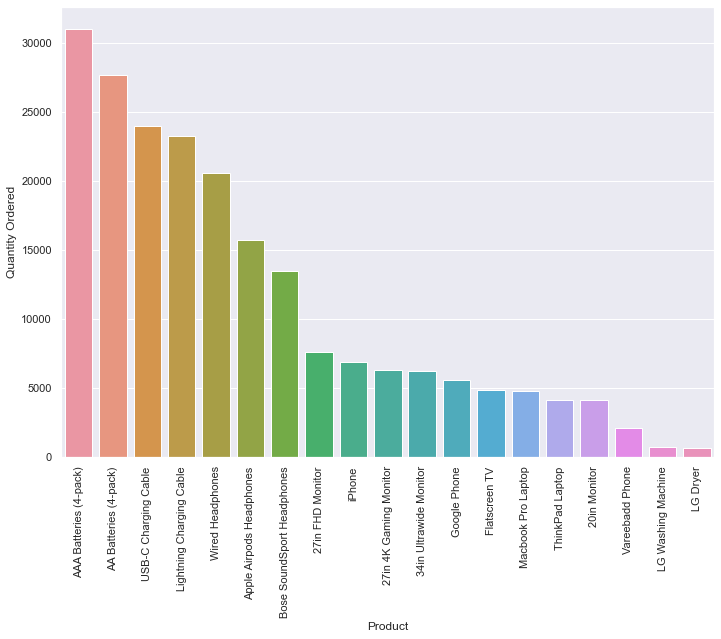

In [44]:
most_sold = pd.DataFrame(most_sold)

most_sold = most_sold.sort_values('Quantity Ordered', ascending = False)
most_sold


ax3=sns.barplot(x=most_sold.index,y='Quantity Ordered',data = most_sold)
ax3.set_xticklabels(most_sold.index, rotation= 90)


In [ ]:
# The Most Sold item was the AAA Bateries(4-Pack), followed by the AA Bateries(4-Pack), and USB-C Chargin Cables.

## What is the correlation between Product and Price?

[Text(0, 0, 'Macbook Pro Laptop'),
 Text(1, 0, 'ThinkPad Laptop'),
 Text(2, 0, 'iPhone'),
 Text(3, 0, 'LG Dryer'),
 Text(4, 0, 'LG Washing Machine'),
 Text(5, 0, 'Google Phone'),
 Text(6, 0, 'Vareebadd Phone'),
 Text(7, 0, '27in 4K Gaming Monitor'),
 Text(8, 0, '34in Ultrawide Monitor'),
 Text(9, 0, 'Flatscreen TV'),
 Text(10, 0, 'Apple Airpods Headphones'),
 Text(11, 0, '27in FHD Monitor'),
 Text(12, 0, '20in Monitor'),
 Text(13, 0, 'Bose SoundSport Headphones'),
 Text(14, 0, 'Lightning Charging Cable'),
 Text(15, 0, 'Wired Headphones'),
 Text(16, 0, 'USB-C Charging Cable'),
 Text(17, 0, 'AA Batteries (4-pack)'),
 Text(18, 0, 'AAA Batteries (4-pack)')]

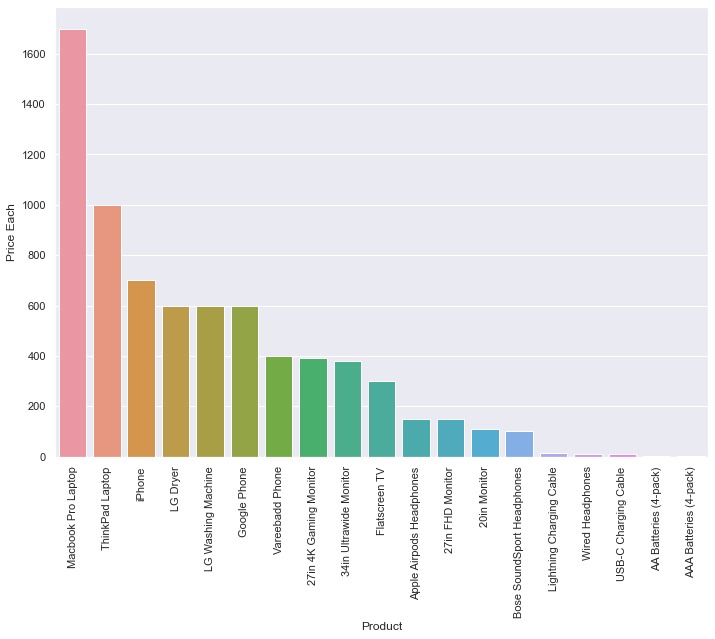

In [46]:
prices = all_data.groupby('Product')['Price Each'].mean()
prices = pd.DataFrame(prices)
prices=prices.sort_values('Price Each', ascending = False)


ax4 = sns.barplot(x=prices.index, y = 'Price Each', data = prices)
ax4.set_xticklabels(prices.index, rotation= 90)

[Text(0, 0, 'Macbook Pro Laptop'),
 Text(1, 0, 'ThinkPad Laptop'),
 Text(2, 0, 'iPhone'),
 Text(3, 0, 'LG Dryer'),
 Text(4, 0, 'LG Washing Machine'),
 Text(5, 0, 'Google Phone'),
 Text(6, 0, 'Vareebadd Phone'),
 Text(7, 0, '27in 4K Gaming Monitor'),
 Text(8, 0, '34in Ultrawide Monitor'),
 Text(9, 0, 'Flatscreen TV'),
 Text(10, 0, 'Apple Airpods Headphones'),
 Text(11, 0, '27in FHD Monitor'),
 Text(12, 0, '20in Monitor'),
 Text(13, 0, 'Bose SoundSport Headphones'),
 Text(14, 0, 'Lightning Charging Cable'),
 Text(15, 0, 'Wired Headphones'),
 Text(16, 0, 'USB-C Charging Cable'),
 Text(17, 0, 'AA Batteries (4-pack)'),
 Text(18, 0, 'AAA Batteries (4-pack)')]

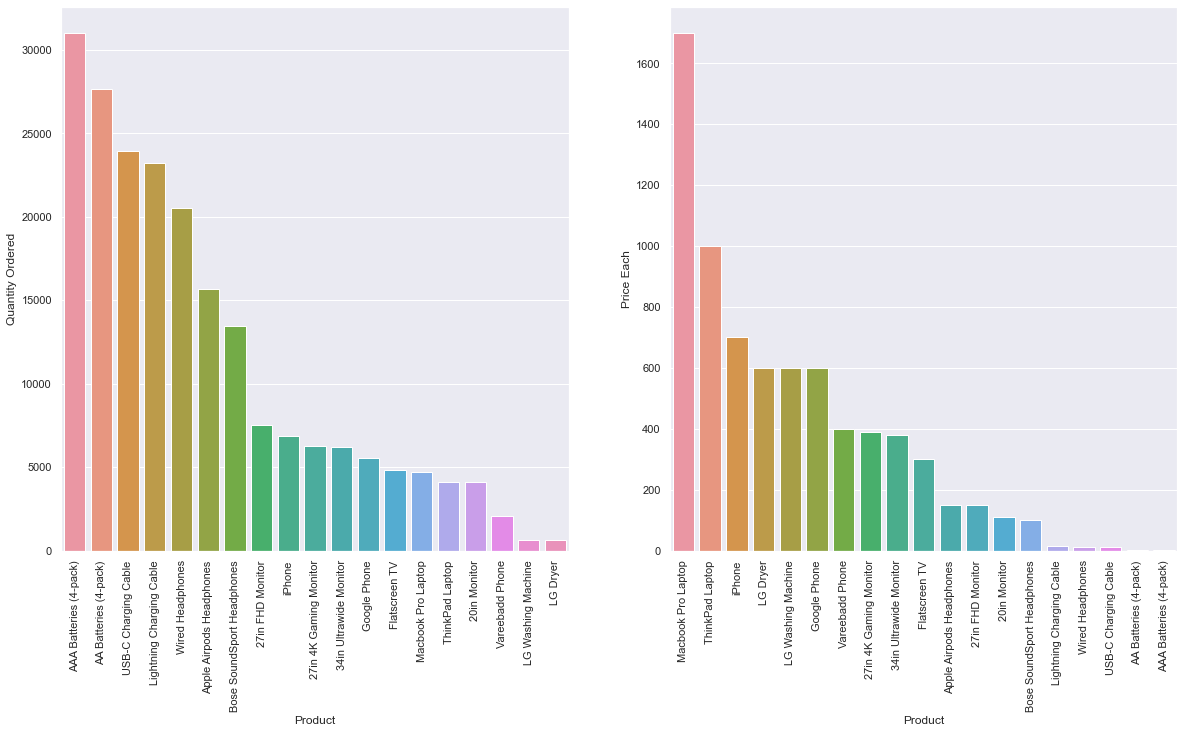

In [47]:

fig, axes = plt.subplots(1,2, sharex= False, figsize=(20,10))

ax3=sns.barplot(x=most_sold.index,y='Quantity Ordered',data = most_sold, ax = axes[0])
ax3.set_xticklabels(most_sold.index, rotation= 90)
ax4 = sns.barplot(x=prices.index, y = 'Price Each', data = prices, ax = axes[1])
ax4.set_xticklabels(prices.index, rotation= 90)


In [49]:
# As seen above, there can be infered that the price of the item can have a direct correlation with how many items are sold within the year.
    # the Number of Products Sold can be observed that the cheaper the product, the higher the number of sales of said product.